<a href="https://colab.research.google.com/github/atomicrajat619/Bank_Loan_Modelling/blob/master/ML_internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:Marketing Campaign for Banking Products**

**Data Description:**
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan)
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Context:**

The bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The department wants you to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

**Attribute Information:**

  ● ID: Customer ID

  ● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?




## **STEP 1:Importing libraries, reading data, statistical summary, checking datatype, shape, null values.**

In [ ]:
#importing necessary standard libraries
import pandas as pd
import numpy as np              #for mathematical calculations
import seaborn as sns           #data visualization
import matplotlib.pyplot as plt #for graphs
%matplotlib inline
import warnings                 #ignoring warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#data reading

df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df_copy=df.copy()    #making copy of the dataset whiuch will be used further
df.head()

ID  Age  Experience  ...  CD Account  Online  CreditCard
0   1   25           1  ...           0       0           0
1   2   45          19  ...           0       0           0
2   3   39          15  ...           0       0           0
3   4   35           9  ...           0       0           0
4   5   35           8  ...           0       0           1

[5 rows x 14 columns]

In [ ]:
#names of the variables, shape and data type of the data set
print(df.columns)
print(df.shape)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
(5000, 14)


**Dependent variable:** 1 variable ( Personal Loan)

**Independent variable:**  13 variables

**Rows of data set:** 5000   (train data + test data) 

**Columns of data set:** 14

**Data type:** object


In [ ]:
#statistical summary of all rows and columns
df.describe()

#Number of NaN/null values in the dataset
df.isnull().sum().sum()

0

## **STEP 2 : EDA :Studying the data distribution in each attribute and target variable and finding from it.** 
* **[report is saved in html format click the link given in the cell to view]**

**Univariate Analysis :**analysis can be done using pandas_profiling which is more detailed than df.describe()



In [ ]:
#!pip install -U pandas_profiling
import pandas_profiling
df.profile_report()

In [ ]:
https://htmlpreview.github.io/?https://github.com/atomicrajat619/Bank_Loan_Modelling/blob/master/report.html #click the link(ctrl+click) to view the report in html format in new page.

**By above report we conclude the following**
* The data set got 0 missing values.
* **7 numeric variables:**[age,cc_avg,ID,Income,Mortgage,Zip_code,Experience]
* **2 categorical variables:**[Education,Family]
* **5 Boolean variables:** [CD_Account, Credit_Card, Online, Personal_Loan, Securities Account]
*  **correlation:**Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage & if the customer has a certificate of deposit (CD) account with the bank.
* Experience is highly correlated with Age (ρ = 0.994214857)

**Other important points to be noted**
* **Categorical:**
1. 42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate.
2. Around 29% of the customer’s family size is 1.
* **Boolean:**
1. 94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.
2. Around 71% of the customer doesn’t use a credit card issued by UniversalBank.
3. Around 60% of customers use internet banking facilities.
4. Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.
5. Around 90% of the customer doesn’t have a securities account with the bank.
* **Numeric:**
1. The mean age of the customers is 45 with standard deviation of 11.5. Also, we had estimated the average age in hypothesis testing between 30–50. The curve is slightly negatively skewed (Skewness = -0.02934068151) hence the curve is fairly symmetrical
2. The mean of Avg. spending on credit cards per month is 1.93 with standard deviation of 1.75. The curve is highly positive skewed (Skewness = 1.598443337)
3. The mean annual income of the customer is 73.77 with standard deviation of 46. The curve is moderately positive skewed (Skewness = 0.8413386073)
4. The mean value of house mortgage is 56.5 with standard deviation of 101.71. The curve is highly positive skewed (Skewness = 2.104002319) and there are a lot of outlier’s present (Kurtosis = 4.756796669)

no need for ‘ID’, ‘ZIP_Code’ & ‘Experience’ columns for further analysis since ‘ID’ and ‘ZIP_Code’ are just numbers of series & ‘Experience’ is highly correlated with ‘Age’.
"""

# **STEP 3 :To check if to clean any variable**

In [ ]:
# Dropping 'ID' 'Zip Code' & 'Experience' column
df.drop(df.columns[[0,4,2]],axis=1,inplace=True)
df.head()


Age  Income  Family  ...  CD Account  Online  CreditCard
0   25      49       4  ...           0       0           0
1   45      34       3  ...           0       0           0
2   39      11       1  ...           0       0           0
3   35     100       1  ...           0       0           0
4   35      45       4  ...           0       0           1

[5 rows x 11 columns]

## **Bivariate Analysis**


* Let’s recall some of the hypotheses that we generated earlier:
* high salaries are less feasible to buy personal loans while customers with medium or low salaries are more feasible for buying personal loans.
* More the number of earning family members, less probability of buying personal loans.
* Customers with probably the age of 30–50 will buy personal loans.
* The customer is a graduate or under-graduate can affect the buying probability, people who are graduated or Advanced Professionals are more viable to buy personal loans from a bank rather than people who are under-graduated.
* Let’s try to test the above-mentioned hypotheses using bivariate analysis
* After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

**Categorical Independent Variable vs Target Variable**

**Personal Loan v/s Education**

Cross tabulation of **Personal loan** buyers and their **Education** level through Bar plot using crosstab function of pandas. 

cross tabulation can be given as:  
 Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
In percentage : 
 Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


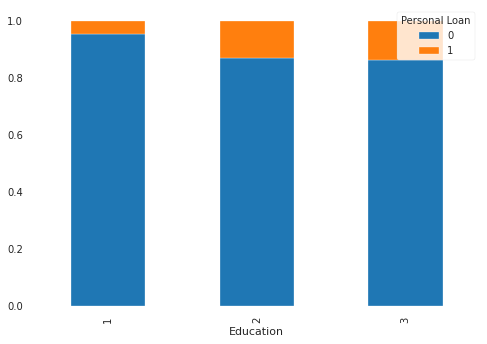

In [ ]:
edu = pd.crosstab(df['Education'],df['Personal Loan'])
graph = edu.div(edu.sum(1).astype(float),axis=0)
print('cross tabulation can be given as: ','\n',edu)
print('In percentage :','\n',graph)
graph.plot(kind='bar',stacked=True)


**Inference :** 
  * More educated customers have higher probability of buying loans.
  * This matches our hypothesis.

**Personal Loan v/s Family members**

Cross tabulation of **Personal loan** buyers with no. of **Family members** through Bar plot using crosstab function of pandas. 

cross tabulation can be given as:  
 Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134
In percentage : 
 Personal Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656


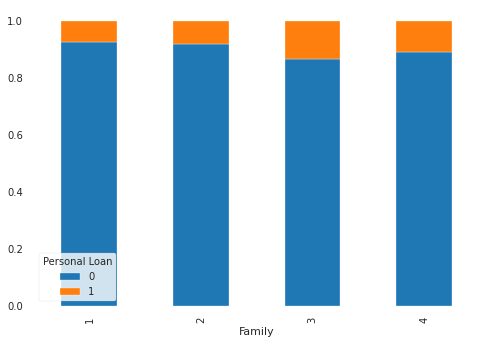

In [ ]:

family = pd.crosstab(df['Family'],df['Personal Loan'])
graph = family.div(family.sum(1).astype(float),axis=0)
print('cross tabulation can be given as: ','\n',family)
print('In percentage :','\n',graph)
graph.plot(kind='bar',stacked=True)


**Inference :** 
  * No. of Family members doesn't affect probabilty.
  * This contradicts our hypothesis.

**Boolean Independent Variable vs Target Variable**

**Personal Loan v/s CD Account**

Cross tabulation of **Personal loan** buyers whether having **Certificate of Deposit (CD Account)** or not through Bar plot using crosstab function of pandas. 

cross tabulation can be given as:  
 Personal Loan     0    1
CD Account              
0              4301  312
1               161  121
In percentage : 
 Personal Loan         0         1
CD Account                       
0              0.932365  0.067635
1              0.570922  0.429078


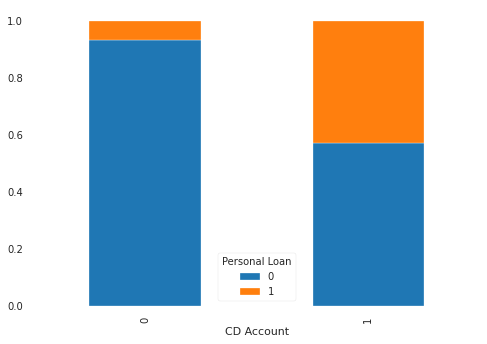

In [ ]:
credit = pd.crosstab(df['CD Account'],df['Personal Loan'])
graph = credit.div(credit.sum(1).astype(float),axis=0)
print('cross tabulation can be given as: ','\n',credit)
print('In percentage :','\n',graph)
graph.plot(kind='bar',stacked=True)


**Inference :** 
  * Customers having CD Account seem to buy Personal Loans.


**Personal Loan v/s Credit card**

Cross tabulation of **Personal loan** buyers whether using **Credit Card** or not through Bar plot using crosstab function of pandas. 

cross tabulation can be given as:  
 Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143
In percentage : 
 Personal Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279


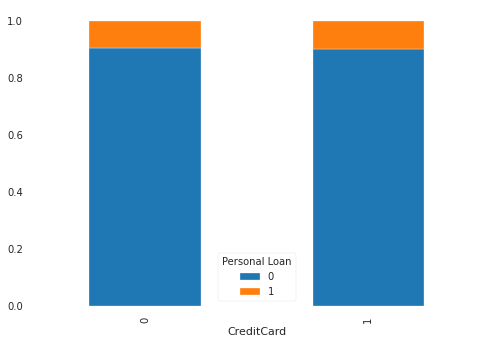

In [ ]:
credit = pd.crosstab(df['CreditCard'],df['Personal Loan'])
graph = credit.div(credit.sum(1).astype(float),axis=0)
print('cross tabulation can be given as: ','\n',credit)
print('In percentage :','\n',graph)
graph.plot(kind='bar',stacked=True)


**Inference :** 
  * Customers using or not using Credit card dont affect the probability.


**Personal Loan v/s Online services**

Cross tabulation of **Personal loan** buyers whether uses **Online services** or not through Bar plot using crosstab function of pandas. 

cross tabulation can be given as:  
 Personal Loan     0    1
Online                  
0              1827  189
1              2693  291
In percentage : 
 Personal Loan        0        1
Online                         
0              0.90625  0.09375
1              0.90248  0.09752


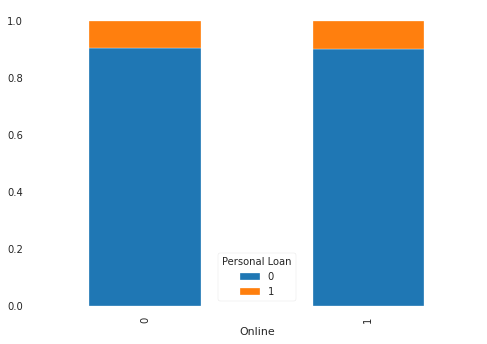

In [ ]:

online = pd.crosstab(df['Online'],df['Personal Loan'])
graph = online.div(online.sum(1).astype(float),axis=0)
print('cross tabulation can be given as: ','\n',online)
print('In percentage :','\n',graph)
graph.plot(kind='bar',stacked=True)


**Inference :** 
  * Customers using or not using Online Services dont affect probability.


**Personal Loan v/s Securities Account**

Cross tabulation of **Personal loan** buyers whether having **Securities Account** or not through Bar plot using crosstab function of pandas. 

cross tabulation can be given as:  
 Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60
In percentage : 
 Personal Loan              0         1
Securities Account                    
0                   0.906208  0.093792
1                   0.885057  0.114943


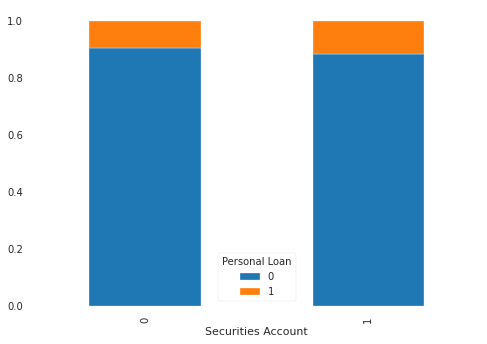

In [ ]:

security = pd.crosstab(df['Securities Account'],df['Personal Loan'])
graph = security.div(security.sum(1).astype(float),axis=0)
print('cross tabulation can be given as: ','\n',security)
print('In percentage :','\n',graph)
graph.plot(kind='bar',stacked=True)


**Inference :** 
  * Customers using or not using Cecurities Account dont affect probability.


**Numerical Independent Variable vs Target Variable**

**Personal Loan v/s Age**
Cross tabulation of **Personal loan** buyers with taking their **Mean Age** and grouping them through Bar plot. 

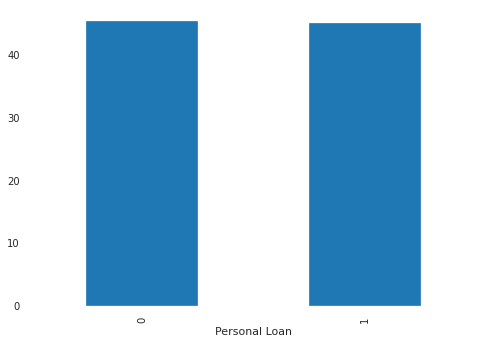

In [ ]:
df.groupby('Personal Loan')['Age'].mean().plot(kind='bar')


Note:
  * As there is no change in the mean age.
  * So we make bins based on the applicant ages and then cross tabulation through Bar plots.

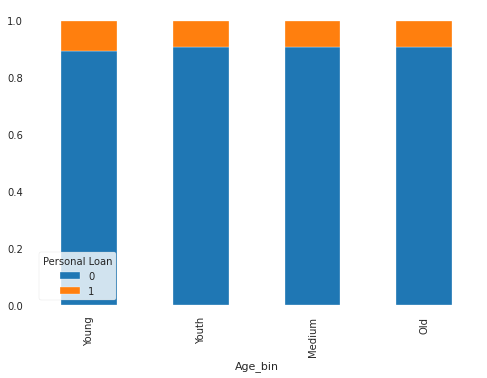

In [ ]:
bins = [23,35,45,55,67]
group = ['Young','Youth','Medium', 'Old']
df['Age_bin'] = pd.cut(df['Age'],bins,labels=group)
age = pd.crosstab(df['Age_bin'],df['Personal Loan'])
#age = pd.crosstab(pd.cut(df['Age'],bins,labels=group),df['Personal Loan'])
age.div(age.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)


**Inference :** 
  * Age of the applicants dont affect probability.
  * This contradicts to our hypothesis.


**Personal Loan v/s CCAvg**

Cross tabulation of **Personal loan** buyers' with their **Average spending on credit Cards per month** through Bar plot. 

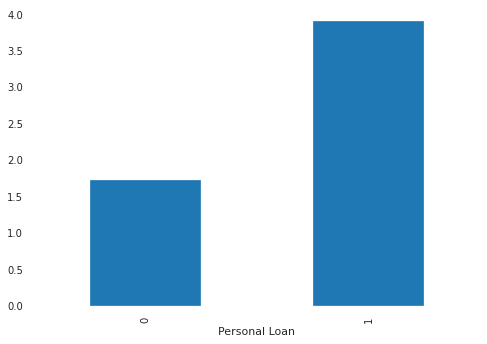

In [ ]:
df.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar')

**Inference :** 
  * Applicants spending on credit cards are more viable to buy Personal Loans.
  


**Personal Loan v/s Income**

Cross tabulation of **Personal loan** buyers' with their **Income** through Bar plot. 

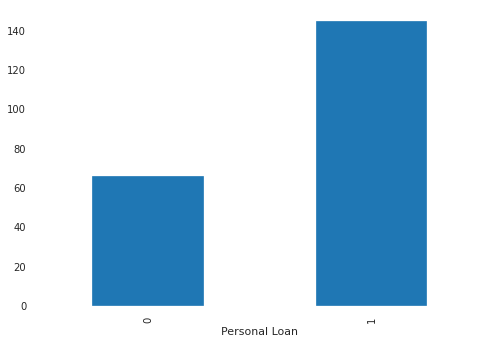

In [ ]:
df.groupby('Personal Loan')['Income'].mean().plot(kind='bar')

**Inference :**
  *High income customers buy more Personal Loan 
  * This contradicts to our hypothesis.

**Personal Loan v/s Experience**
Cross tabulation of **Personal loan** buyers with their **Experience** through Bar plot. 

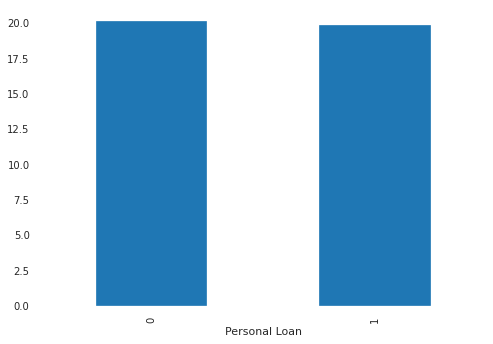

In [ ]:
df_copy.groupby('Personal Loan')['Experience'].mean().plot(kind='bar')


**Inference:**
  * Experience doesnt affect probability.

In [ ]:
# removing age bin column as age is not affecting probability
df.drop(df.columns[-1],axis=1,inplace=True)   

In [ ]:
#Rechecking if missing value is there:
df.isnull().sum()

Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Treating outlier**
  * Removing skewness from Mortgage column which consist of Outlier(which affects Mean and standard deviation and hence distribution of data) by doing z-score.
  * We remove rows which contain ouliers.
  * So kept only rows whose z-score < 3.
    


In [ ]:
from scipy import  stats

In [ ]:
df['Mortgage_zscore']=np.abs(stats.zscore(df['Mortgage']))
df = df[df['Mortgage_zscore']<3]
df.drop('Mortgage_zscore',axis=1,inplace=True)

In [ ]:
df.shape

(4895, 11)

**Model Building: Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split   #importing library for splitting the data
from sklearn.linear_model import LogisticRegression    #Importing model
from sklearn.metrics import accuracy_score             #importing library to check the accuracy of the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

In [ ]:
X=df.drop('Personal Loan',axis=1)            #set of independent variables
y=df['Personal Loan']                        #Set of dependent variable
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)   # splitting data 

In [ ]:
LogReg_model=LogisticRegression()

In [ ]:
LogReg_model.fit(X_train,y_train)        #fitting the model into training dataset

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict=LogReg_model.predict(X_test)
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1117
           1       0.81      0.61      0.70       107

    accuracy                           0.95      1224
   macro avg       0.89      0.80      0.83      1224
weighted avg       0.95      0.95      0.95      1224

0.9534313725490197
[[1102   15]
 [  42   65]]


In [ ]:
LogReg_prob=LogReg_model.predict_proba(X_test)
fpr1,tpr1,thresholds1= roc_curve(y_test, LogReg_prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print("Area under the ROC curve: %f" % roc_auc1)

Area under the ROC curve: 0.952208


In [ ]:
#To increase accuracy and increase the area undr the ROC curve.
from sklearn import preprocessing      
col_names=df.columns
scaler=preprocessing.StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [ ]:
LogReg_model=LogisticRegression()
LogReg_model.fit(scaled_X_train,y_train)   #fitting the model into training dataset

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict=LogReg_model.predict(scaled_X_test)
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1117
           1       0.84      0.63      0.72       107

    accuracy                           0.96      1224
   macro avg       0.90      0.81      0.85      1224
weighted avg       0.95      0.96      0.95      1224

0.9566993464052288
[[1104   13]
 [  40   67]]


In [ ]:
Log_Reg_prob=LogReg_model.predict_proba(scaled_X_test)
fpr2,tpr2,thresholds2= roc_curve(y_test, Log_Reg_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under the ROC curve: %f" % roc_auc2)

Area under the ROC curve: 0.954836


**Naive Bayes**

  * Bayes theorem uses the conditional probability of an event. 
  * Bayes Theorem assumes predictors or input features are independent of each other.
  * Bayesian probability relates to the degree of belief. It gives the likelihood of an event to occur. It does this with prior knowledge of the condition related to the event
  * Let’s implement it in python which is as simple as importing the package and fitting the dataset.


In [ ]:
from sklearn.naive_bayes import GaussianNB 

naive_model=GaussianNB()
naive_model.fit(scaled_X_train, y_train)
y_predict=naive_model.predict(scaled_X_test)
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1117
           1       0.43      0.60      0.50       107

    accuracy                           0.90      1224
   macro avg       0.69      0.76      0.72      1224
weighted avg       0.91      0.90      0.90      1224

0.8954248366013072
[[1032   85]
 [  43   64]]


In [ ]:
naive_prob=naive_model.predict_proba(scaled_X_test)
fpr3,tpr3,thresholds3= roc_curve(y_test, naive_prob[:,1])
roc_auc3=auc(fpr3,tpr3)
print("Area under the ROC curve: %f" % roc_auc3)

Area under the ROC curve: 0.926012


We got an accuracy score of around 90% with a recall value of 61% which is much less as compared to the Logistic Regression.
Also, the area under the curve is around 93%, less than the logistic regression one.
Hence Naive Bayes terms out to be not a good classifier with this particular dataset.

**kNN**

  * kNN is a supervised algorithm, it is non-parametric and lazy (instance-based).
  * It does not explicitly learn the model, but it saves all the training data and uses the whole training set for classification or prediction. This contrasts with other techniques like SVM, where you can discard all non-support vectors without any problem.
  * This means that the training process is very fast, it just saves all the values from the data set. The real problem is the huge memory consumption (because we must store all the data) and time complexity at the testing time (since classifying a given observation requires a rundown of the whole data set). But in general, it’s a very useful algorithm in case of small data sets (or if you have lots of time and memory) or for educational purposes.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
kNN_model=KNeighborsClassifier(n_neighbors=3)
kNN_model.fit(scaled_X_train, y_train)
y_predict=kNN_model.predict(scaled_X_test)
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1117
           1       0.89      0.70      0.79       107

    accuracy                           0.97      1224
   macro avg       0.93      0.85      0.88      1224
weighted avg       0.97      0.97      0.96      1224

0.9665032679738562
[[1108    9]
 [  32   75]]


In [ ]:
kNN_prob=kNN_model.predict_proba(scaled_X_test)
fpr4,tpr4,thresholds4= roc_curve(y_test, kNN_prob[:,1])
roc_auc4=auc(fpr4,tpr4)
print("Area under the ROC curve: %f" % roc_auc4)

Area under the ROC curve: 0.941490


  * We import the KNeighborsClassifier from sklearn. This takes multiple parameters. The most important parameters are:
    * n_neighbors: the value of k, the number of neighbor’s considered
    * weights: if you want to use weighted attributes, here you can configure the weights. This takes values like the uniform, distance (inverse distance to the new point) or callable which should be defined by the user. The default value is uniform.
    * algorithm: if you want a different representation of the data, here you can use values like ball_tree, kd_tree or brute, default is auto which tries to automatically select the best representation for the current data set.
    * metric: the distance metric (Euclidean, Manhattan, etc), default is Euclidean.
  * We leave all the default parameters, but for n_neighbors we had use 3 (the default is 5).
  * And here we are with around 97% accuracy in determining if a customer will buy the personal loan or not. Also, the recall value is 66% is much better than logistic regression and Naive Bayes algorithms. Also, the area under the curve is fairly good.

**SVM (Support Vector Machine)**

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two-dimensional space, this hyperplane is a line dividing a plane into two parts wherein each class lay on either side.

Let us see if we can classify between a buyer and a non-buyer.

In [ ]:
from sklearn import svm 
clf=svm.SVC(C=3,kernel='rbf',probability=True)
clf.fit(scaled_X_train, y_train)
y_predict=clf.predict(scaled_X_test)
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1117
           1       0.95      0.84      0.89       107

    accuracy                           0.98      1224
   macro avg       0.97      0.92      0.94      1224
weighted avg       0.98      0.98      0.98      1224

0.9820261437908496
[[1112    5]
 [  17   90]]


In [ ]:
svm_prob=clf.predict_proba(scaled_X_test)
fpr5,tpr5,thresholds5= roc_curve(y_test, svm_prob[:,1])
roc_auc5=auc(fpr5,tpr5)
print("Area under the ROC curve: %f" % roc_auc5)

Area under the ROC curve: 0.982722


We got 98% accuracy score with 84% recall value, also the area under the curve is about 98%


**Conclusion :**
  * SVM can be deployed to predict the likelihood of a liability customer buying personal loans.